## Import Dataset

In [ ]:
!rm -r ~/.kaggle
! mkdir ~/.kaggle
from google.colab import files
files.upload() 
!cp ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

rm: cannot remove '/root/.kaggle': No such file or directory


Saving kaggle.json to kaggle.json


In [ ]:
! kaggle datasets download mlg-ulb/creditcardfraud

 97% 64.0M/66.0M [00:03<00:00, 24.5MB/s]
100% 66.0M/66.0M [00:03<00:00, 18.2MB/s]


In [ ]:
! unzip creditcardfraud

Archive:  creditcardfraud.zip
  inflating: creditcard.csv          


## Import Libraires

In [ ]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from keras.layers import Input, Dense
from keras.models import Model, load_model, Sequential
from sklearn.model_selection import train_test_split
from keras.callbacks import ModelCheckpoint, TensorBoard, ReduceLROnPlateau
from tensorflow import keras

In [ ]:
file_path = "/content/creditcard.csv"
dataset = pd.read_csv(file_path)
dataset = dataset.dropna()
dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


## Dataset Review

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

## Compare Fraud and NonFraud

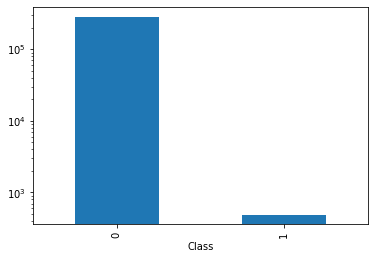

In [ ]:
dataset.groupby('Class')['Class'].count().plot.bar(logy=True)

In [ ]:
frauds = dataset[dataset.Class == 1]
normal = dataset[dataset.Class == 0]
print(f'Fraud Shape: {frauds.shape} \nNormal Shape: {normal.shape}')

Fraud Shape: (492, 31) 
Normal Shape: (284315, 31)


In [ ]:
print(f'Fraud Amount Description \n{"-"*20}')
print(frauds.Amount.describe(), '\n')
print("="*30)
print(f'\nNormal Amount Description \n{"-"*20}')
print(normal.Amount.describe())

Fraud Amount Description 
--------------------
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64 


Normal Amount Description 
--------------------
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


## Remove Time and Class columns to get train data

In [ ]:
X = dataset.drop(["Time", "Class"], axis=1).values
X

array([[-1.35980713e+00, -7.27811733e-02,  2.53634674e+00, ...,
         1.33558377e-01, -2.10530535e-02,  1.49620000e+02],
       [ 1.19185711e+00,  2.66150712e-01,  1.66480113e-01, ...,
        -8.98309914e-03,  1.47241692e-02,  2.69000000e+00],
       [-1.35835406e+00, -1.34016307e+00,  1.77320934e+00, ...,
        -5.53527940e-02, -5.97518406e-02,  3.78660000e+02],
       ...,
       [ 1.91956501e+00, -3.01253846e-01, -3.24963981e+00, ...,
         4.45477214e-03, -2.65608286e-02,  6.78800000e+01],
       [-2.40440050e-01,  5.30482513e-01,  7.02510230e-01, ...,
         1.08820735e-01,  1.04532821e-01,  1.00000000e+01],
       [-5.33412522e-01, -1.89733337e-01,  7.03337367e-01, ...,
        -2.41530880e-03,  1.36489143e-02,  2.17000000e+02]])

## Make array of labels

In [ ]:
Y = dataset['Class'].values
Y = np.expand_dims(Y, axis=1)
Y

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [ ]:
X = preprocessing.scale(X)
X

array([[-0.69424232, -0.04407492,  1.6727735 , ...,  0.33089162,
        -0.06378115,  0.24496426],
       [ 0.60849633,  0.16117592,  0.1097971 , ..., -0.02225568,
         0.04460752, -0.34247454],
       [-0.69350046, -0.81157783,  1.16946849, ..., -0.13713686,
        -0.18102083,  1.16068593],
       ...,
       [ 0.98002374, -0.18243372, -2.14320514, ...,  0.01103672,
        -0.0804672 , -0.0818393 ],
       [-0.12275539,  0.32125034,  0.46332013, ...,  0.26960398,
         0.31668678, -0.31324853],
       [-0.27233093, -0.11489898,  0.46386564, ..., -0.00598394,
         0.04134999,  0.51435531]])

## Split data to train and test and resample using SMOTE (oversampling)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state = 1, stratify = Y )
smt = SMOTE()
X_train_resampled, y_train_resampled = smt.fit_resample(X_train, y_train)
np.bincount(y_train_resampled)

array([213236, 213236])

In [ ]:
print(f'X_train Shape: {X_train.shape} \ny_train Shape: {y_train.shape}')

X_train Shape: (213605, 29) 
y_train Shape: (213605, 1)


In [ ]:
print(f'X_train_resampled Shape: {X_train_resampled.shape} \ny_train_resampled Shape: {y_train_resampled.shape}')

X_train_resampled Shape: (426472, 29) 
y_train_resampled Shape: (426472,)


## Classification measures

In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [ ]:
def add_gaussian_noise(nparray):
    noise = np.random.normal(loc=0.0, scale=0.02, size=np.shape(nparray))
    nparray += noise
    return nparray

In [ ]:
# data dimensions // hyperparameters 
input_dim = 29
BATCH_SIZE = 128
EPOCHS = 50
METRICS = [
      'accuracy',
      precision_m,
      recall_m,
      f1_m
]

## Encoder network

In [ ]:
autoencoder = tf.keras.models.Sequential([
    
    # deconstruct / encode
    Dense(input_dim, activation='relu', input_shape=(input_dim, )), 
    Dense(22, activation='relu'),
    Dense(15, activation='relu'),

    Dense(10, activation='relu'),
    
    # reconstruction / decode
    Dense(15, activation='relu'),
    Dense(22, activation='relu'),
    Dense(input_dim, activation='relu')
    
])
autoencoder.compile(optimizer="adam", 
                    loss=tf.keras.losses.MeanSquaredError(),
                    metrics='accuracy')

# print an overview of our model
autoencoder.summary();

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 29)                870       
                                                                 
 dense_15 (Dense)            (None, 22)                660       
                                                                 
 dense_16 (Dense)            (None, 15)                345       
                                                                 
 dense_17 (Dense)            (None, 10)                160       
                                                                 
 dense_18 (Dense)            (None, 15)                165       
                                                                 
 dense_19 (Dense)            (None, 22)                352       
                                                                 
 dense_20 (Dense)            (None, 29)               

## Define early stopping

In [ ]:
from datetime import datetime

# current date and time
yyyymmddHHMM = datetime.now().strftime('%Y%m%d%H%M')

# new folder for a new run
log_subdir = f'{yyyymmddHHMM}_batch{BATCH_SIZE}_layers{len(autoencoder.layers)}'

# define our early stopping
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.0001,
    patience=10,
    verbose=1, 
    mode='min',
    restore_best_weights=True
)

save_model = tf.keras.callbacks.ModelCheckpoint(
    filepath='/content/autoencoder_best_weights.hdf5',
    save_best_only=True,
    monitor='val_loss',
    verbose=0,
    mode='min'
)

tensorboard = tf.keras.callbacks.TensorBoard(
    f'/content/logs/{log_subdir}',
    update_freq='batch',
    histogram_freq=0,
    write_graph=True,
    write_images=True
)

# callbacks argument only takes a list
cb = [early_stop, save_model, tensorboard]

## Add gaussian noise and then use encoder to train model

In [ ]:
# add gaussian noise to oversampled data
X_train_resampled_noisy = add_gaussian_noise(X_train_resampled)

history = autoencoder.fit(
    X_train_resampled_noisy, y_train_resampled,
    shuffle=True,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    callbacks=cb,
    validation_data=(X_test, y_test)
);

Epoch 1/50
3332/3332 [==============================] - 14s 3ms/step - loss: 0.0646 - accuracy: 0.4746 - val_loss: 0.0030 - val_accuracy: 0.9921
Epoch 2/50
3332/3332 [==============================] - 11s 3ms/step - loss: 0.0535 - accuracy: 0.5576 - val_loss: 0.0044 - val_accuracy: 0.9884
Epoch 3/50
3332/3332 [==============================] - 11s 3ms/step - loss: 0.0530 - accuracy: 0.5314 - val_loss: 0.0028 - val_accuracy: 0.9934
Epoch 4/50
3332/3332 [==============================] - 11s 3ms/step - loss: 0.0528 - accuracy: 0.5089 - val_loss: 0.0019 - val_accuracy: 0.9948
Epoch 5/50
3332/3332 [==============================] - 11s 3ms/step - loss: 0.0527 - accuracy: 0.5033 - val_loss: 0.0010 - val_accuracy: 0.9971
Epoch 6/50
3332/3332 [==============================] - 11s 3ms/step - loss: 0.0526 - accuracy: 0.5080 - val_loss: 0.0015 - val_accuracy: 0.9961
Epoch 7/50
3332/3332 [==============================] - 11s 3ms/step - loss: 0.0525 - accuracy: 0.5127 - val_loss: 0.0016 - val_ac

In [ ]:
X_train_resampled_denoised = autoencoder.predict(X_train_resampled)

13328/13328 [==============================] - 18s 1ms/step


## Classification network using softmax and categorical_crossentropy

In [ ]:
classifier = tf.keras.models.Sequential([   
    # deconstruct / encode
    tf.keras.layers.Dense(input_dim, activation='relu', input_shape=(input_dim, )), 
    tf.keras.layers.Dense(22, activation='relu'),
    tf.keras.layers.Dense(15, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax'),    
])

classifier.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=METRICS)

classifier.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 29)                870       
                                                                 
 dense_22 (Dense)            (None, 22)                660       
                                                                 
 dense_23 (Dense)            (None, 15)                345       
                                                                 
 dense_24 (Dense)            (None, 10)                160       
                                                                 
 dense_25 (Dense)            (None, 5)                 55        
                                                                 
 dense_26 (Dense)            (None, 2)                 12        
                                                                 
Total params: 2,102
Trainable params: 2,102
Non-traina

In [ ]:
y_train_resampled

array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
y_train_resampled = tf.keras.utils.to_categorical(y_train_resampled)
y_train_resampled

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [ ]:
classification_history = classifier.fit(
    X_train_resampled_denoised, y_train_resampled,
    shuffle=True,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    callbacks=cb,
);

Epoch 1/50
3331/3332 [============================>.] - ETA: 0s - loss: 0.0741 - accuracy: 0.9855 - precision_m: 0.9853 - recall_m: 0.9853 - f1_m: 0.9853

3332/3332 [==============================] - 12s 3ms/step - loss: 0.0741 - accuracy: 0.9855 - precision_m: 0.9854 - recall_m: 0.9854 - f1_m: 0.9854
Epoch 2/50
3332/3332 [==============================] - ETA: 0s - loss: 0.0551 - accuracy: 0.9889 - precision_m: 0.9889 - recall_m: 0.9889 - f1_m: 0.9889

3332/3332 [==============================] - 11s 3ms/step - loss: 0.0551 - accuracy: 0.9889 - precision_m: 0.9889 - recall_m: 0.9889 - f1_m: 0.9889
Epoch 3/50
3326/3332 [============================>.] - ETA: 0s - loss: 0.0547 - accuracy: 0.9890 - precision_m: 0.9890 - recall_m: 0.9890 - f1_m: 0.9890

3332/3332 [==============================] - 11s 3ms/step - loss: 0.0547 - accuracy: 0.9890 - precision_m: 0.9890 - recall_m: 0.9890 - f1_m: 0.9890
Epoch 4/50
3326/3332 [============================>.] - ETA: 0s - loss: 0.0545 - accuracy: 0.9890 - precision_m: 0.9890 - recall_m: 0.9890 - f1_m: 0.9890

3332/3332 [==============================] - 11s 3ms/step - loss: 0.0545 - accuracy: 0.9890 - precision_m: 0.9890 - recall_m: 0.9890 - f1_m: 0.9890
Epoch 5/50
3322/3332 [============================>.] - ETA: 0s - loss: 0.0545 - accuracy: 0.9890 - precision_m: 0.9890 - recall_m: 0.9890 - f1_m: 0.9890

3332/3332 [==============================] - 11s 3ms/step - loss: 0.0545 - accuracy: 0.9890 - precision_m: 0.9890 - recall_m: 0.9890 - f1_m: 0.9890
Epoch 6/50
3327/3332 [============================>.] - ETA: 0s - loss: 0.0545 - accuracy: 0.9890 - precision_m: 0.9890 - recall_m: 0.9890 - f1_m: 0.9890

3332/3332 [==============================] - 11s 3ms/step - loss: 0.0544 - accuracy: 0.9890 - precision_m: 0.9890 - recall_m: 0.9890 - f1_m: 0.9890
Epoch 7/50
3331/3332 [============================>.] - ETA: 0s - loss: 0.0544 - accuracy: 0.9891 - precision_m: 0.9891 - recall_m: 0.9891 - f1_m: 0.9891

3332/3332 [==============================] - 11s 3ms/step - loss: 0.0544 - accuracy: 0.9890 - precision_m: 0.9890 - recall_m: 0.9890 - f1_m: 0.9890
Epoch 8/50
3332/3332 [==============================] - ETA: 0s - loss: 0.0544 - accuracy: 0.9891 - precision_m: 0.9891 - recall_m: 0.9891 - f1_m: 0.9891

3332/3332 [==============================] - 11s 3ms/step - loss: 0.0544 - accuracy: 0.9891 - precision_m: 0.9891 - recall_m: 0.9891 - f1_m: 0.9891
Epoch 9/50
3331/3332 [============================>.] - ETA: 0s - loss: 0.0543 - accuracy: 0.9891 - precision_m: 0.9891 - recall_m: 0.9891 - f1_m: 0.9891

3332/3332 [==============================] - 11s 3ms/step - loss: 0.0543 - accuracy: 0.9891 - precision_m: 0.9891 - recall_m: 0.9891 - f1_m: 0.9891
Epoch 10/50
3326/3332 [============================>.] - ETA: 0s - loss: 0.0543 - accuracy: 0.9891 - precision_m: 0.9891 - recall_m: 0.9891 - f1_m: 0.9891

3332/3332 [==============================] - 11s 3ms/step - loss: 0.0543 - accuracy: 0.9891 - precision_m: 0.9891 - recall_m: 0.9891 - f1_m: 0.9891
Epoch 11/50
3324/3332 [============================>.] - ETA: 0s - loss: 0.0543 - accuracy: 0.9891 - precision_m: 0.9891 - recall_m: 0.9891 - f1_m: 0.9891

3332/3332 [==============================] - 11s 3ms/step - loss: 0.0543 - accuracy: 0.9891 - precision_m: 0.9891 - recall_m: 0.9891 - f1_m: 0.9891
Epoch 12/50
3331/3332 [============================>.] - ETA: 0s - loss: 0.0543 - accuracy: 0.9891 - precision_m: 0.9891 - recall_m: 0.9891 - f1_m: 0.9891

3332/3332 [==============================] - 11s 3ms/step - loss: 0.0542 - accuracy: 0.9891 - precision_m: 0.9891 - recall_m: 0.9891 - f1_m: 0.9891
Epoch 13/50
3322/3332 [============================>.] - ETA: 0s - loss: 0.0542 - accuracy: 0.9891 - precision_m: 0.9891 - recall_m: 0.9891 - f1_m: 0.9891

3332/3332 [==============================] - 11s 3ms/step - loss: 0.0543 - accuracy: 0.9891 - precision_m: 0.9891 - recall_m: 0.9891 - f1_m: 0.9891
Epoch 14/50
3320/3332 [============================>.] - ETA: 0s - loss: 0.0542 - accuracy: 0.9891 - precision_m: 0.9891 - recall_m: 0.9891 - f1_m: 0.9891

3332/3332 [==============================] - 11s 3ms/step - loss: 0.0543 - accuracy: 0.9891 - precision_m: 0.9891 - recall_m: 0.9891 - f1_m: 0.9891
Epoch 15/50
3324/3332 [============================>.] - ETA: 0s - loss: 0.0543 - accuracy: 0.9891 - precision_m: 0.9891 - recall_m: 0.9891 - f1_m: 0.9891

3332/3332 [==============================] - 11s 3ms/step - loss: 0.0543 - accuracy: 0.9891 - precision_m: 0.9891 - recall_m: 0.9891 - f1_m: 0.9891
Epoch 16/50
3331/3332 [============================>.] - ETA: 0s - loss: 0.0545 - accuracy: 0.9890 - precision_m: 0.9890 - recall_m: 0.9890 - f1_m: 0.9890

3332/3332 [==============================] - 11s 3ms/step - loss: 0.0545 - accuracy: 0.9890 - precision_m: 0.9890 - recall_m: 0.9890 - f1_m: 0.9890
Epoch 17/50
3331/3332 [============================>.] - ETA: 0s - loss: 0.0542 - accuracy: 0.9891 - precision_m: 0.9891 - recall_m: 0.9891 - f1_m: 0.9891

3332/3332 [==============================] - 11s 3ms/step - loss: 0.0542 - accuracy: 0.9891 - precision_m: 0.9891 - recall_m: 0.9891 - f1_m: 0.9891
Epoch 18/50
3329/3332 [============================>.] - ETA: 0s - loss: 0.0542 - accuracy: 0.9891 - precision_m: 0.9891 - recall_m: 0.9891 - f1_m: 0.9891

3332/3332 [==============================] - 11s 3ms/step - loss: 0.0542 - accuracy: 0.9891 - precision_m: 0.9891 - recall_m: 0.9891 - f1_m: 0.9891
Epoch 19/50
3321/3332 [============================>.] - ETA: 0s - loss: 0.0543 - accuracy: 0.9891 - precision_m: 0.9891 - recall_m: 0.9891 - f1_m: 0.9891

3332/3332 [==============================] - 11s 3ms/step - loss: 0.0542 - accuracy: 0.9891 - precision_m: 0.9891 - recall_m: 0.9891 - f1_m: 0.9891
Epoch 20/50
3329/3332 [============================>.] - ETA: 0s - loss: 0.0543 - accuracy: 0.9891 - precision_m: 0.9891 - recall_m: 0.9891 - f1_m: 0.9891

3332/3332 [==============================] - 11s 3ms/step - loss: 0.0543 - accuracy: 0.9891 - precision_m: 0.9891 - recall_m: 0.9891 - f1_m: 0.9891
Epoch 21/50
3331/3332 [============================>.] - ETA: 0s - loss: 0.0542 - accuracy: 0.9891 - precision_m: 0.9891 - recall_m: 0.9891 - f1_m: 0.9891

3332/3332 [==============================] - 11s 3ms/step - loss: 0.0542 - accuracy: 0.9891 - precision_m: 0.9891 - recall_m: 0.9891 - f1_m: 0.9891
Epoch 22/50
3332/3332 [==============================] - ETA: 0s - loss: 0.0542 - accuracy: 0.9891 - precision_m: 0.9891 - recall_m: 0.9891 - f1_m: 0.9891

3332/3332 [==============================] - 11s 3ms/step - loss: 0.0542 - accuracy: 0.9891 - precision_m: 0.9891 - recall_m: 0.9891 - f1_m: 0.9891
Epoch 23/50
3329/3332 [============================>.] - ETA: 0s - loss: 0.0543 - accuracy: 0.9891 - precision_m: 0.9891 - recall_m: 0.9891 - f1_m: 0.9891

3332/3332 [==============================] - 11s 3ms/step - loss: 0.0542 - accuracy: 0.9891 - precision_m: 0.9891 - recall_m: 0.9891 - f1_m: 0.9891
Epoch 24/50
3332/3332 [==============================] - ETA: 0s - loss: 0.0542 - accuracy: 0.9891 - precision_m: 0.9891 - recall_m: 0.9891 - f1_m: 0.9891

3332/3332 [==============================] - 11s 3ms/step - loss: 0.0542 - accuracy: 0.9891 - precision_m: 0.9891 - recall_m: 0.9891 - f1_m: 0.9891
Epoch 25/50
3332/3332 [==============================] - ETA: 0s - loss: 0.0542 - accuracy: 0.9891 - precision_m: 0.9891 - recall_m: 0.9891 - f1_m: 0.9891

3332/3332 [==============================] - 11s 3ms/step - loss: 0.0542 - accuracy: 0.9891 - precision_m: 0.9891 - recall_m: 0.9891 - f1_m: 0.9891
Epoch 26/50
3320/3332 [============================>.] - ETA: 0s - loss: 0.0541 - accuracy: 0.9891 - precision_m: 0.9891 - recall_m: 0.9891 - f1_m: 0.9891

3332/3332 [==============================] - 11s 3ms/step - loss: 0.0541 - accuracy: 0.9891 - precision_m: 0.9891 - recall_m: 0.9891 - f1_m: 0.9891
Epoch 27/50
3324/3332 [============================>.] - ETA: 0s - loss: 0.0541 - accuracy: 0.9891 - precision_m: 0.9891 - recall_m: 0.9891 - f1_m: 0.9891

3332/3332 [==============================] - 11s 3ms/step - loss: 0.0541 - accuracy: 0.9891 - precision_m: 0.9891 - recall_m: 0.9891 - f1_m: 0.9891
Epoch 28/50
3321/3332 [============================>.] - ETA: 0s - loss: 0.0543 - accuracy: 0.9891 - precision_m: 0.9891 - recall_m: 0.9891 - f1_m: 0.9891

3332/3332 [==============================] - 11s 3ms/step - loss: 0.0542 - accuracy: 0.9891 - precision_m: 0.9891 - recall_m: 0.9891 - f1_m: 0.9891
Epoch 29/50
3328/3332 [============================>.] - ETA: 0s - loss: 0.0542 - accuracy: 0.9891 - precision_m: 0.9891 - recall_m: 0.9891 - f1_m: 0.9891

3332/3332 [==============================] - 11s 3ms/step - loss: 0.0541 - accuracy: 0.9891 - precision_m: 0.9891 - recall_m: 0.9891 - f1_m: 0.9891
Epoch 30/50
3321/3332 [============================>.] - ETA: 0s - loss: 0.0541 - accuracy: 0.9891 - precision_m: 0.9891 - recall_m: 0.9891 - f1_m: 0.9891

3332/3332 [==============================] - 11s 3ms/step - loss: 0.0541 - accuracy: 0.9891 - precision_m: 0.9891 - recall_m: 0.9891 - f1_m: 0.9891
Epoch 31/50
3320/3332 [============================>.] - ETA: 0s - loss: 0.0542 - accuracy: 0.9891 - precision_m: 0.9891 - recall_m: 0.9891 - f1_m: 0.9891

3332/3332 [==============================] - 11s 3ms/step - loss: 0.0542 - accuracy: 0.9891 - precision_m: 0.9891 - recall_m: 0.9891 - f1_m: 0.9891
Epoch 32/50
3323/3332 [============================>.] - ETA: 0s - loss: 0.0542 - accuracy: 0.9891 - precision_m: 0.9891 - recall_m: 0.9891 - f1_m: 0.9891

3332/3332 [==============================] - 11s 3ms/step - loss: 0.0541 - accuracy: 0.9891 - precision_m: 0.9891 - recall_m: 0.9891 - f1_m: 0.9891
Epoch 33/50
3324/3332 [============================>.] - ETA: 0s - loss: 0.0541 - accuracy: 0.9891 - precision_m: 0.9891 - recall_m: 0.9891 - f1_m: 0.9891

3332/3332 [==============================] - 11s 3ms/step - loss: 0.0541 - accuracy: 0.9891 - precision_m: 0.9891 - recall_m: 0.9891 - f1_m: 0.9891
Epoch 34/50
3322/3332 [============================>.] - ETA: 0s - loss: 0.0542 - accuracy: 0.9891 - precision_m: 0.9891 - recall_m: 0.9891 - f1_m: 0.9891

3332/3332 [==============================] - 11s 3ms/step - loss: 0.0542 - accuracy: 0.9891 - precision_m: 0.9891 - recall_m: 0.9891 - f1_m: 0.9891
Epoch 35/50
3327/3332 [============================>.] - ETA: 0s - loss: 0.0541 - accuracy: 0.9891 - precision_m: 0.9891 - recall_m: 0.9891 - f1_m: 0.9891

3332/3332 [==============================] - 11s 3ms/step - loss: 0.0542 - accuracy: 0.9891 - precision_m: 0.9891 - recall_m: 0.9891 - f1_m: 0.9891
Epoch 36/50
3321/3332 [============================>.] - ETA: 0s - loss: 0.0541 - accuracy: 0.9891 - precision_m: 0.9891 - recall_m: 0.9891 - f1_m: 0.9891

3332/3332 [==============================] - 11s 3ms/step - loss: 0.0541 - accuracy: 0.9891 - precision_m: 0.9891 - recall_m: 0.9891 - f1_m: 0.9891
Epoch 37/50
3328/3332 [============================>.] - ETA: 0s - loss: 0.0541 - accuracy: 0.9891 - precision_m: 0.9891 - recall_m: 0.9891 - f1_m: 0.9891

3332/3332 [==============================] - 11s 3ms/step - loss: 0.0541 - accuracy: 0.9891 - precision_m: 0.9891 - recall_m: 0.9891 - f1_m: 0.9891
Epoch 38/50
3328/3332 [============================>.] - ETA: 0s - loss: 0.0541 - accuracy: 0.9891 - precision_m: 0.9891 - recall_m: 0.9891 - f1_m: 0.9891

3332/3332 [==============================] - 11s 3ms/step - loss: 0.0541 - accuracy: 0.9891 - precision_m: 0.9891 - recall_m: 0.9891 - f1_m: 0.9891
Epoch 39/50
3318/3332 [============================>.] - ETA: 0s - loss: 0.0541 - accuracy: 0.9891 - precision_m: 0.9891 - recall_m: 0.9891 - f1_m: 0.9891

3332/3332 [==============================] - 11s 3ms/step - loss: 0.0541 - accuracy: 0.9891 - precision_m: 0.9891 - recall_m: 0.9891 - f1_m: 0.9891
Epoch 40/50
3324/3332 [============================>.] - ETA: 0s - loss: 0.0541 - accuracy: 0.9891 - precision_m: 0.9891 - recall_m: 0.9891 - f1_m: 0.9891

3332/3332 [==============================] - 11s 3ms/step - loss: 0.0541 - accuracy: 0.9891 - precision_m: 0.9891 - recall_m: 0.9891 - f1_m: 0.9891
Epoch 41/50
3322/3332 [============================>.] - ETA: 0s - loss: 0.0541 - accuracy: 0.9891 - precision_m: 0.9891 - recall_m: 0.9891 - f1_m: 0.9891

3332/3332 [==============================] - 11s 3ms/step - loss: 0.0541 - accuracy: 0.9891 - precision_m: 0.9891 - recall_m: 0.9891 - f1_m: 0.9891
Epoch 42/50
3326/3332 [============================>.] - ETA: 0s - loss: 0.0540 - accuracy: 0.9891 - precision_m: 0.9891 - recall_m: 0.9891 - f1_m: 0.9891

3332/3332 [==============================] - 11s 3ms/step - loss: 0.0541 - accuracy: 0.9891 - precision_m: 0.9891 - recall_m: 0.9891 - f1_m: 0.9891
Epoch 43/50
3318/3332 [============================>.] - ETA: 0s - loss: 0.0541 - accuracy: 0.9891 - precision_m: 0.9891 - recall_m: 0.9891 - f1_m: 0.9891

3332/3332 [==============================] - 11s 3ms/step - loss: 0.0541 - accuracy: 0.9891 - precision_m: 0.9891 - recall_m: 0.9891 - f1_m: 0.9891
Epoch 44/50
3329/3332 [============================>.] - ETA: 0s - loss: 0.0541 - accuracy: 0.9891 - precision_m: 0.9891 - recall_m: 0.9891 - f1_m: 0.9891

3332/3332 [==============================] - 11s 3ms/step - loss: 0.0541 - accuracy: 0.9891 - precision_m: 0.9891 - recall_m: 0.9891 - f1_m: 0.9891
Epoch 45/50
3319/3332 [============================>.] - ETA: 0s - loss: 0.0542 - accuracy: 0.9891 - precision_m: 0.9891 - recall_m: 0.9891 - f1_m: 0.9891

3332/3332 [==============================] - 11s 3ms/step - loss: 0.0542 - accuracy: 0.9891 - precision_m: 0.9891 - recall_m: 0.9891 - f1_m: 0.9891
Epoch 46/50
3328/3332 [============================>.] - ETA: 0s - loss: 0.0541 - accuracy: 0.9891 - precision_m: 0.9891 - recall_m: 0.9891 - f1_m: 0.9891

3332/3332 [==============================] - 11s 3ms/step - loss: 0.0541 - accuracy: 0.9891 - precision_m: 0.9891 - recall_m: 0.9891 - f1_m: 0.9891
Epoch 47/50
3326/3332 [============================>.] - ETA: 0s - loss: 0.0541 - accuracy: 0.9891 - precision_m: 0.9891 - recall_m: 0.9891 - f1_m: 0.9891

3332/3332 [==============================] - 11s 3ms/step - loss: 0.0541 - accuracy: 0.9891 - precision_m: 0.9891 - recall_m: 0.9891 - f1_m: 0.9891
Epoch 48/50
3322/3332 [============================>.] - ETA: 0s - loss: 0.0541 - accuracy: 0.9891 - precision_m: 0.9891 - recall_m: 0.9891 - f1_m: 0.9891

3332/3332 [==============================] - 11s 3ms/step - loss: 0.0541 - accuracy: 0.9891 - precision_m: 0.9891 - recall_m: 0.9891 - f1_m: 0.9891
Epoch 49/50
3327/3332 [============================>.] - ETA: 0s - loss: 0.0541 - accuracy: 0.9891 - precision_m: 0.9891 - recall_m: 0.9891 - f1_m: 0.9891

3332/3332 [==============================] - 11s 3ms/step - loss: 0.0541 - accuracy: 0.9891 - precision_m: 0.9891 - recall_m: 0.9891 - f1_m: 0.9891
Epoch 50/50
3324/3332 [============================>.] - ETA: 0s - loss: 0.0542 - accuracy: 0.9891 - precision_m: 0.9891 - recall_m: 0.9891 - f1_m: 0.9891

3332/3332 [==============================] - 11s 3ms/step - loss: 0.0541 - accuracy: 0.9891 - precision_m: 0.9891 - recall_m: 0.9891 - f1_m: 0.9891


In [ ]:
y_test

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [ ]:
y_test_cat = tf.keras.utils.to_categorical(y_test)
y_test_cat

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

## Results on test

In [ ]:
loss, acc, f1_score, precision, recall = classifier.evaluate(X_test, y_test_cat, verbose=0)
print(f"\n LOSS: {loss},\n\n ACCURACY: {acc},\n\n F1_SCORE: {f1_score},\n\n PRECISION: {precision},\n\n RECALL: {recall}\n")


 LOSS: 36.93486785888672,

 ACCURACY: 0.5605741143226624,

 F1_SCORE: 0.5605486035346985,

 PRECISION: 0.5605486035346985,

 RECALL: 0.5605486035346985



In [ ]:
predictions = classifier.predict(X_test)
predictions = tf.nn.softmax(predictions)
predictions

2226/2226 [==============================] - 3s 1ms/step


<tf.Tensor: shape=(71202, 2), dtype=float32, numpy=
array([[0.73105854, 0.26894143],
       [0.73105854, 0.26894143],
       [0.72776675, 0.27223328],
       ...,
       [0.26894143, 0.73105854],
       [0.3130606 , 0.6869394 ],
       [0.7164345 , 0.28356552]], dtype=float32)>

## Confusion matrix

Text(0.5, 145.31999999999996, 'Predicted')

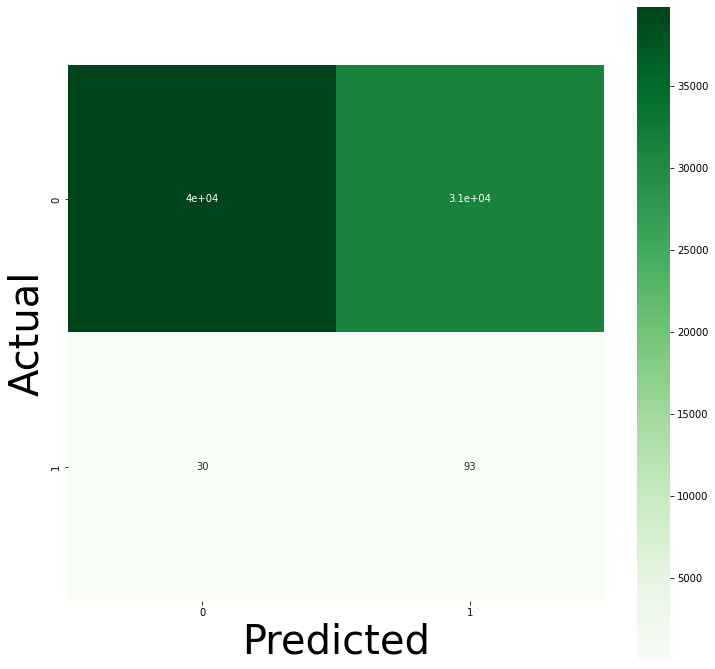

In [ ]:
from sklearn.metrics import confusion_matrix

Y_pred = np.argmax(predictions, axis=1)
Y_true = np.argmax(y_test_cat, axis=1)

cm = confusion_matrix(Y_true, Y_pred)
plt.figure(figsize=(12, 12))
ax = sns.heatmap(cm, cmap=plt.cm.Greens, annot=True, square=True, xticklabels=[0, 1], yticklabels=[0, 1])
ax.set_ylabel('Actual', fontsize=40)
ax.set_xlabel('Predicted', fontsize=40)

In [ ]:
from sklearn.metrics import classification_report

report = classification_report(Y_true, Y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.56      0.72     71079
           1       0.00      0.76      0.01       123

    accuracy                           0.56     71202
   macro avg       0.50      0.66      0.36     71202
weighted avg       1.00      0.56      0.72     71202



In [ ]:
from tqdm import tqdm

evaluate_results = []
for threshold in np.arange(0, 1.01, 0.1):
    TP, FN, FP, TN = 0, 0, 0, 0
    for i in tqdm(range(len(y_test))):
        prediction = predictions[i]
        actual = y_test_cat[i]
        if prediction[1] >= threshold and actual[1] == 1:
            TP += 1
        elif prediction[1] >= threshold and actual[1] == 0:
            FP += 1
        elif prediction[1] < threshold and actual[1] == 1:
            FN += 1
        elif prediction[1] < threshold and actual[1] == 0:
            TN += 1
    result = dict()
    result['threshold'] = threshold
    result['TP'] = TP
    result['FP'] = FP
    result['FN'] = FN
    result['TN'] = TN
    result['recall'] = 0 if TP + FN == 0  else TP / (TP + FN)
    result['precision'] = 0 if TP + FP == 0 else TP / (TP + FP)
    result['accuracy'] = (TP + TN) / (TP + FN + FP + TN)
    evaluate_results.append(result)
    print(result)

100%|██████████| 71202/71202 [01:09<00:00, 1026.34it/s]


{'threshold': 0.0, 'TP': 123, 'FP': 71079, 'FN': 0, 'TN': 0, 'recall': 1.0, 'precision': 0.0017274795651807534, 'accuracy': 0.0017274795651807534}


100%|██████████| 71202/71202 [01:09<00:00, 1017.75it/s]


{'threshold': 0.1, 'TP': 123, 'FP': 71079, 'FN': 0, 'TN': 0, 'recall': 1.0, 'precision': 0.0017274795651807534, 'accuracy': 0.0017274795651807534}


100%|██████████| 71202/71202 [01:09<00:00, 1020.32it/s]


{'threshold': 0.2, 'TP': 123, 'FP': 71079, 'FN': 0, 'TN': 0, 'recall': 1.0, 'precision': 0.0017274795651807534, 'accuracy': 0.0017274795651807534}


100%|██████████| 71202/71202 [01:39<00:00, 716.34it/s]


{'threshold': 0.30000000000000004, 'TP': 93, 'FP': 31702, 'FN': 30, 'TN': 39377, 'recall': 0.7560975609756098, 'precision': 0.002924988205692719, 'accuracy': 0.5543383612819864}


100%|██████████| 71202/71202 [01:40<00:00, 708.83it/s]


{'threshold': 0.4, 'TP': 93, 'FP': 31402, 'FN': 30, 'TN': 39677, 'recall': 0.7560975609756098, 'precision': 0.0029528496586759805, 'accuracy': 0.5585517260751103}


100%|██████████| 71202/71202 [01:39<00:00, 715.35it/s]


{'threshold': 0.5, 'TP': 93, 'FP': 31258, 'FN': 30, 'TN': 39821, 'recall': 0.7560975609756098, 'precision': 0.002966412554623457, 'accuracy': 0.5605741411758096}


100%|██████████| 71202/71202 [01:40<00:00, 711.51it/s]


{'threshold': 0.6000000000000001, 'TP': 93, 'FP': 31120, 'FN': 30, 'TN': 39959, 'recall': 0.7560975609756098, 'precision': 0.002979527760868869, 'accuracy': 0.5625122889806466}


100%|██████████| 71202/71202 [01:40<00:00, 708.72it/s]


{'threshold': 0.7000000000000001, 'TP': 93, 'FP': 30692, 'FN': 30, 'TN': 40387, 'recall': 0.7560975609756098, 'precision': 0.003020951762221861, 'accuracy': 0.5685233560855032}


100%|██████████| 71202/71202 [02:03<00:00, 576.31it/s]


{'threshold': 0.8, 'TP': 0, 'FP': 0, 'FN': 123, 'TN': 71079, 'recall': 0.0, 'precision': 0, 'accuracy': 0.9982725204348193}


100%|██████████| 71202/71202 [02:02<00:00, 579.10it/s]


{'threshold': 0.9, 'TP': 0, 'FP': 0, 'FN': 123, 'TN': 71079, 'recall': 0.0, 'precision': 0, 'accuracy': 0.9982725204348193}


100%|██████████| 71202/71202 [02:03<00:00, 577.35it/s]

{'threshold': 1.0, 'TP': 0, 'FP': 0, 'FN': 123, 'TN': 71079, 'recall': 0.0, 'precision': 0, 'accuracy': 0.9982725204348193}


## Evaluate using diffrent thresholds

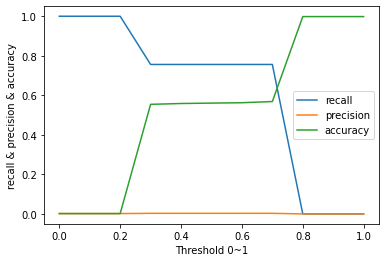

In [ ]:
threshold_array = [result['threshold'] for result in evaluate_results]
recall_array = [result['recall'] for result in evaluate_results]
precision_array = [result['precision'] for result in evaluate_results]
accuracy_array = [result['accuracy'] for result in evaluate_results]
plt.plot(threshold_array, recall_array, label='recall')
plt.plot(threshold_array, precision_array, label='precision')
plt.plot(threshold_array, accuracy_array, label='accuracy')
plt.xlabel('Threshold 0~1')
plt.ylabel('recall & precision & accuracy')
plt.legend()
plt.show()

Epoch 1/50
1667/1669 [============================>.] - ETA: 0s - loss: 0.1956 - accuracy: 0.9932 - precision_m: 0.9932 - recall_m: 0.9932 - f1_m: 0.9932

1669/1669 [==============================] - 6s 3ms/step - loss: 0.1954 - accuracy: 0.9932 - precision_m: 0.9932 - recall_m: 0.9932 - f1_m: 0.9932
Epoch 2/50
1668/1669 [============================>.] - ETA: 0s - loss: 0.0068 - accuracy: 0.9983 - precision_m: 0.9983 - recall_m: 0.9983 - f1_m: 0.9983

1669/1669 [==============================] - 6s 3ms/step - loss: 0.0068 - accuracy: 0.9983 - precision_m: 0.9983 - recall_m: 0.9983 - f1_m: 0.9983
Epoch 3/50
1659/1669 [============================>.] - ETA: 0s - loss: 0.0054 - accuracy: 0.9983 - precision_m: 0.9983 - recall_m: 0.9983 - f1_m: 0.9983

1669/1669 [==============================] - 5s 3ms/step - loss: 0.0054 - accuracy: 0.9983 - precision_m: 0.9983 - recall_m: 0.9983 - f1_m: 0.9983
Epoch 4/50
1661/1669 [============================>.] - ETA: 0s - loss: 0.0044 - accuracy: 0.9986 - precision_m: 0.9986 - recall_m: 0.9986 - f1_m: 0.9986

1669/1669 [==============================] - 5s 3ms/step - loss: 0.0044 - accuracy: 0.9986 - precision_m: 0.9986 - recall_m: 0.9986 - f1_m: 0.9986
Epoch 5/50
1666/1669 [============================>.] - ETA: 0s - loss: 0.0038 - accuracy: 0.9986 - precision_m: 0.9986 - recall_m: 0.9986 - f1_m: 0.9986

1669/1669 [==============================] - 6s 3ms/step - loss: 0.0038 - accuracy: 0.9986 - precision_m: 0.9986 - recall_m: 0.9986 - f1_m: 0.9986
Epoch 6/50
1665/1669 [============================>.] - ETA: 0s - loss: 0.0035 - accuracy: 0.9989 - precision_m: 0.9989 - recall_m: 0.9989 - f1_m: 0.9989

1669/1669 [==============================] - 6s 3ms/step - loss: 0.0035 - accuracy: 0.9989 - precision_m: 0.9989 - recall_m: 0.9989 - f1_m: 0.9989
Epoch 7/50
1664/1669 [============================>.] - ETA: 0s - loss: 0.0032 - accuracy: 0.9993 - precision_m: 0.9993 - recall_m: 0.9993 - f1_m: 0.9993

1669/1669 [==============================] - 6s 3ms/step - loss: 0.0032 - accuracy: 0.9993 - precision_m: 0.9993 - recall_m: 0.9993 - f1_m: 0.9993
Epoch 8/50
1657/1669 [============================>.] - ETA: 0s - loss: 0.0028 - accuracy: 0.9993 - precision_m: 0.9993 - recall_m: 0.9993 - f1_m: 0.9993

1669/1669 [==============================] - 5s 3ms/step - loss: 0.0029 - accuracy: 0.9993 - precision_m: 0.9993 - recall_m: 0.9993 - f1_m: 0.9993
Epoch 9/50
1668/1669 [============================>.] - ETA: 0s - loss: 0.0028 - accuracy: 0.9993 - precision_m: 0.9993 - recall_m: 0.9993 - f1_m: 0.9993

1669/1669 [==============================] - 6s 3ms/step - loss: 0.0028 - accuracy: 0.9993 - precision_m: 0.9993 - recall_m: 0.9993 - f1_m: 0.9993
Epoch 10/50
1656/1669 [============================>.] - ETA: 0s - loss: 0.0027 - accuracy: 0.9993 - precision_m: 0.9993 - recall_m: 0.9993 - f1_m: 0.9993

1669/1669 [==============================] - 6s 3ms/step - loss: 0.0027 - accuracy: 0.9993 - precision_m: 0.9993 - recall_m: 0.9993 - f1_m: 0.9993
Epoch 11/50
1665/1669 [============================>.] - ETA: 0s - loss: 0.0026 - accuracy: 0.9993 - precision_m: 0.9993 - recall_m: 0.9993 - f1_m: 0.9993

1669/1669 [==============================] - 6s 3ms/step - loss: 0.0026 - accuracy: 0.9993 - precision_m: 0.9993 - recall_m: 0.9993 - f1_m: 0.9993
Epoch 12/50
1657/1669 [============================>.] - ETA: 0s - loss: 0.0024 - accuracy: 0.9993 - precision_m: 0.9993 - recall_m: 0.9993 - f1_m: 0.9993

1669/1669 [==============================] - 5s 3ms/step - loss: 0.0024 - accuracy: 0.9993 - precision_m: 0.9993 - recall_m: 0.9993 - f1_m: 0.9993
Epoch 13/50
1666/1669 [============================>.] - ETA: 0s - loss: 0.0023 - accuracy: 0.9993 - precision_m: 0.9993 - recall_m: 0.9993 - f1_m: 0.9993

1669/1669 [==============================] - 5s 3ms/step - loss: 0.0023 - accuracy: 0.9993 - precision_m: 0.9993 - recall_m: 0.9993 - f1_m: 0.9993
Epoch 14/50
1666/1669 [============================>.] - ETA: 0s - loss: 0.0023 - accuracy: 0.9994 - precision_m: 0.9994 - recall_m: 0.9994 - f1_m: 0.9994

1669/1669 [==============================] - 5s 3ms/step - loss: 0.0023 - accuracy: 0.9994 - precision_m: 0.9994 - recall_m: 0.9994 - f1_m: 0.9994
Epoch 15/50
1660/1669 [============================>.] - ETA: 0s - loss: 0.0023 - accuracy: 0.9994 - precision_m: 0.9994 - recall_m: 0.9994 - f1_m: 0.9994

1669/1669 [==============================] - 5s 3ms/step - loss: 0.0023 - accuracy: 0.9994 - precision_m: 0.9994 - recall_m: 0.9994 - f1_m: 0.9994
Epoch 16/50
1668/1669 [============================>.] - ETA: 0s - loss: 0.0022 - accuracy: 0.9994 - precision_m: 0.9994 - recall_m: 0.9994 - f1_m: 0.9994

1669/1669 [==============================] - 5s 3ms/step - loss: 0.0022 - accuracy: 0.9994 - precision_m: 0.9994 - recall_m: 0.9994 - f1_m: 0.9994
Epoch 17/50
1655/1669 [============================>.] - ETA: 0s - loss: 0.0021 - accuracy: 0.9994 - precision_m: 0.9994 - recall_m: 0.9994 - f1_m: 0.9994

1669/1669 [==============================] - 6s 3ms/step - loss: 0.0021 - accuracy: 0.9994 - precision_m: 0.9994 - recall_m: 0.9994 - f1_m: 0.9994
Epoch 18/50
1664/1669 [============================>.] - ETA: 0s - loss: 0.0020 - accuracy: 0.9994 - precision_m: 0.9994 - recall_m: 0.9994 - f1_m: 0.9994

1669/1669 [==============================] - 5s 3ms/step - loss: 0.0021 - accuracy: 0.9994 - precision_m: 0.9994 - recall_m: 0.9994 - f1_m: 0.9994
Epoch 19/50
1666/1669 [============================>.] - ETA: 0s - loss: 0.0020 - accuracy: 0.9994 - precision_m: 0.9994 - recall_m: 0.9994 - f1_m: 0.9994

1669/1669 [==============================] - 5s 3ms/step - loss: 0.0020 - accuracy: 0.9994 - precision_m: 0.9994 - recall_m: 0.9994 - f1_m: 0.9994
Epoch 20/50
1664/1669 [============================>.] - ETA: 0s - loss: 0.0020 - accuracy: 0.9994 - precision_m: 0.9994 - recall_m: 0.9994 - f1_m: 0.9994

1669/1669 [==============================] - 5s 3ms/step - loss: 0.0020 - accuracy: 0.9994 - precision_m: 0.9994 - recall_m: 0.9994 - f1_m: 0.9994
Epoch 21/50
1667/1669 [============================>.] - ETA: 0s - loss: 0.0018 - accuracy: 0.9994 - precision_m: 0.9994 - recall_m: 0.9994 - f1_m: 0.9994

1669/1669 [==============================] - 5s 3ms/step - loss: 0.0018 - accuracy: 0.9994 - precision_m: 0.9994 - recall_m: 0.9994 - f1_m: 0.9994
Epoch 22/50
1661/1669 [============================>.] - ETA: 0s - loss: 0.0018 - accuracy: 0.9994 - precision_m: 0.9994 - recall_m: 0.9994 - f1_m: 0.9994

1669/1669 [==============================] - 6s 3ms/step - loss: 0.0018 - accuracy: 0.9994 - precision_m: 0.9994 - recall_m: 0.9994 - f1_m: 0.9994
Epoch 23/50
1669/1669 [==============================] - ETA: 0s - loss: 0.0017 - accuracy: 0.9994 - precision_m: 0.9994 - recall_m: 0.9994 - f1_m: 0.9994

1669/1669 [==============================] - 5s 3ms/step - loss: 0.0017 - accuracy: 0.9994 - precision_m: 0.9994 - recall_m: 0.9994 - f1_m: 0.9994
Epoch 24/50
1666/1669 [============================>.] - ETA: 0s - loss: 0.0017 - accuracy: 0.9995 - precision_m: 0.9995 - recall_m: 0.9995 - f1_m: 0.9995

1669/1669 [==============================] - 5s 3ms/step - loss: 0.0017 - accuracy: 0.9994 - precision_m: 0.9994 - recall_m: 0.9994 - f1_m: 0.9994
Epoch 25/50
1656/1669 [============================>.] - ETA: 0s - loss: 0.0016 - accuracy: 0.9995 - precision_m: 0.9995 - recall_m: 0.9995 - f1_m: 0.9995

1669/1669 [==============================] - 6s 3ms/step - loss: 0.0016 - accuracy: 0.9995 - precision_m: 0.9995 - recall_m: 0.9995 - f1_m: 0.9995
Epoch 26/50
1661/1669 [============================>.] - ETA: 0s - loss: 0.0016 - accuracy: 0.9994 - precision_m: 0.9994 - recall_m: 0.9994 - f1_m: 0.9994

1669/1669 [==============================] - 6s 3ms/step - loss: 0.0016 - accuracy: 0.9994 - precision_m: 0.9994 - recall_m: 0.9994 - f1_m: 0.9994
Epoch 27/50
1661/1669 [============================>.] - ETA: 0s - loss: 0.0015 - accuracy: 0.9995 - precision_m: 0.9995 - recall_m: 0.9995 - f1_m: 0.9995

1669/1669 [==============================] - 6s 3ms/step - loss: 0.0015 - accuracy: 0.9995 - precision_m: 0.9995 - recall_m: 0.9995 - f1_m: 0.9995
Epoch 28/50
1665/1669 [============================>.] - ETA: 0s - loss: 0.0015 - accuracy: 0.9995 - precision_m: 0.9995 - recall_m: 0.9995 - f1_m: 0.9995

1669/1669 [==============================] - 5s 3ms/step - loss: 0.0015 - accuracy: 0.9995 - precision_m: 0.9995 - recall_m: 0.9995 - f1_m: 0.9995
Epoch 29/50
1657/1669 [============================>.] - ETA: 0s - loss: 0.0015 - accuracy: 0.9995 - precision_m: 0.9995 - recall_m: 0.9995 - f1_m: 0.9995

1669/1669 [==============================] - 5s 3ms/step - loss: 0.0015 - accuracy: 0.9995 - precision_m: 0.9995 - recall_m: 0.9995 - f1_m: 0.9995
Epoch 30/50
1665/1669 [============================>.] - ETA: 0s - loss: 0.0015 - accuracy: 0.9994 - precision_m: 0.9994 - recall_m: 0.9994 - f1_m: 0.9994

1669/1669 [==============================] - 6s 3ms/step - loss: 0.0015 - accuracy: 0.9994 - precision_m: 0.9994 - recall_m: 0.9994 - f1_m: 0.9994
Epoch 31/50
1659/1669 [============================>.] - ETA: 0s - loss: 0.0013 - accuracy: 0.9995 - precision_m: 0.9995 - recall_m: 0.9995 - f1_m: 0.9995

1669/1669 [==============================] - 6s 3ms/step - loss: 0.0013 - accuracy: 0.9995 - precision_m: 0.9995 - recall_m: 0.9995 - f1_m: 0.9995
Epoch 32/50
1666/1669 [============================>.] - ETA: 0s - loss: 0.0015 - accuracy: 0.9995 - precision_m: 0.9995 - recall_m: 0.9995 - f1_m: 0.9995

1669/1669 [==============================] - 6s 3ms/step - loss: 0.0015 - accuracy: 0.9995 - precision_m: 0.9995 - recall_m: 0.9995 - f1_m: 0.9995
Epoch 33/50
1663/1669 [============================>.] - ETA: 0s - loss: 0.0013 - accuracy: 0.9995 - precision_m: 0.9995 - recall_m: 0.9995 - f1_m: 0.9995

1669/1669 [==============================] - 6s 3ms/step - loss: 0.0013 - accuracy: 0.9995 - precision_m: 0.9995 - recall_m: 0.9995 - f1_m: 0.9995
Epoch 34/50
1668/1669 [============================>.] - ETA: 0s - loss: 0.0012 - accuracy: 0.9996 - precision_m: 0.9996 - recall_m: 0.9996 - f1_m: 0.9996

1669/1669 [==============================] - 5s 3ms/step - loss: 0.0012 - accuracy: 0.9996 - precision_m: 0.9996 - recall_m: 0.9996 - f1_m: 0.9996
Epoch 35/50
1663/1669 [============================>.] - ETA: 0s - loss: 0.0014 - accuracy: 0.9995 - precision_m: 0.9995 - recall_m: 0.9995 - f1_m: 0.9995

1669/1669 [==============================] - 5s 3ms/step - loss: 0.0014 - accuracy: 0.9995 - precision_m: 0.9995 - recall_m: 0.9995 - f1_m: 0.9995
Epoch 36/50
1665/1669 [============================>.] - ETA: 0s - loss: 0.0012 - accuracy: 0.9995 - precision_m: 0.9995 - recall_m: 0.9995 - f1_m: 0.9995

1669/1669 [==============================] - 5s 3ms/step - loss: 0.0012 - accuracy: 0.9995 - precision_m: 0.9995 - recall_m: 0.9995 - f1_m: 0.9995
Epoch 37/50
1659/1669 [============================>.] - ETA: 0s - loss: 0.0013 - accuracy: 0.9995 - precision_m: 0.9995 - recall_m: 0.9995 - f1_m: 0.9995

1669/1669 [==============================] - 6s 3ms/step - loss: 0.0013 - accuracy: 0.9995 - precision_m: 0.9995 - recall_m: 0.9995 - f1_m: 0.9995
Epoch 38/50
1668/1669 [============================>.] - ETA: 0s - loss: 0.0011 - accuracy: 0.9995 - precision_m: 0.9995 - recall_m: 0.9995 - f1_m: 0.9995

1669/1669 [==============================] - 6s 3ms/step - loss: 0.0011 - accuracy: 0.9995 - precision_m: 0.9995 - recall_m: 0.9995 - f1_m: 0.9995
Epoch 39/50
1665/1669 [============================>.] - ETA: 0s - loss: 0.0012 - accuracy: 0.9995 - precision_m: 0.9995 - recall_m: 0.9995 - f1_m: 0.9995

1669/1669 [==============================] - 6s 3ms/step - loss: 0.0012 - accuracy: 0.9996 - precision_m: 0.9996 - recall_m: 0.9996 - f1_m: 0.9996
Epoch 40/50
1662/1669 [============================>.] - ETA: 0s - loss: 0.0012 - accuracy: 0.9995 - precision_m: 0.9995 - recall_m: 0.9995 - f1_m: 0.9995

1669/1669 [==============================] - 6s 4ms/step - loss: 0.0012 - accuracy: 0.9995 - precision_m: 0.9995 - recall_m: 0.9995 - f1_m: 0.9995
Epoch 41/50
1658/1669 [============================>.] - ETA: 0s - loss: 0.0011 - accuracy: 0.9996 - precision_m: 0.9996 - recall_m: 0.9996 - f1_m: 0.9996

1669/1669 [==============================] - 6s 3ms/step - loss: 0.0011 - accuracy: 0.9996 - precision_m: 0.9996 - recall_m: 0.9996 - f1_m: 0.9996
Epoch 42/50
1668/1669 [============================>.] - ETA: 0s - loss: 9.5694e-04 - accuracy: 0.9996 - precision_m: 0.9996 - recall_m: 0.9996 - f1_m: 0.9996

1669/1669 [==============================] - 6s 3ms/step - loss: 9.5649e-04 - accuracy: 0.9996 - precision_m: 0.9996 - recall_m: 0.9996 - f1_m: 0.9996
Epoch 43/50
1658/1669 [============================>.] - ETA: 0s - loss: 0.0012 - accuracy: 0.9996 - precision_m: 0.9996 - recall_m: 0.9996 - f1_m: 0.9996

1669/1669 [==============================] - 5s 3ms/step - loss: 0.0012 - accuracy: 0.9996 - precision_m: 0.9996 - recall_m: 0.9996 - f1_m: 0.9996
Epoch 44/50
1658/1669 [============================>.] - ETA: 0s - loss: 9.8488e-04 - accuracy: 0.9996 - precision_m: 0.9996 - recall_m: 0.9996 - f1_m: 0.9996

1669/1669 [==============================] - 6s 3ms/step - loss: 9.8320e-04 - accuracy: 0.9996 - precision_m: 0.9996 - recall_m: 0.9996 - f1_m: 0.9996
Epoch 45/50
1669/1669 [==============================] - ETA: 0s - loss: 0.0011 - accuracy: 0.9996 - precision_m: 0.9996 - recall_m: 0.9996 - f1_m: 0.9996

1669/1669 [==============================] - 5s 3ms/step - loss: 0.0011 - accuracy: 0.9996 - precision_m: 0.9996 - recall_m: 0.9996 - f1_m: 0.9996
Epoch 46/50
1665/1669 [============================>.] - ETA: 0s - loss: 9.5580e-04 - accuracy: 0.9996 - precision_m: 0.9996 - recall_m: 0.9996 - f1_m: 0.9996

1669/1669 [==============================] - 6s 3ms/step - loss: 9.5409e-04 - accuracy: 0.9996 - precision_m: 0.9996 - recall_m: 0.9996 - f1_m: 0.9996
Epoch 47/50
1663/1669 [============================>.] - ETA: 0s - loss: 8.8354e-04 - accuracy: 0.9996 - precision_m: 0.9996 - recall_m: 0.9996 - f1_m: 0.9996

1669/1669 [==============================] - 5s 3ms/step - loss: 8.8130e-04 - accuracy: 0.9996 - precision_m: 0.9996 - recall_m: 0.9996 - f1_m: 0.9996
Epoch 48/50
1668/1669 [============================>.] - ETA: 0s - loss: 9.1301e-04 - accuracy: 0.9996 - precision_m: 0.9996 - recall_m: 0.9996 - f1_m: 0.9996

1669/1669 [==============================] - 6s 3ms/step - loss: 9.1258e-04 - accuracy: 0.9996 - precision_m: 0.9996 - recall_m: 0.9996 - f1_m: 0.9996
Epoch 49/50
1658/1669 [============================>.] - ETA: 0s - loss: 0.0011 - accuracy: 0.9996 - precision_m: 0.9996 - recall_m: 0.9996 - f1_m: 0.9996

1669/1669 [==============================] - 6s 3ms/step - loss: 0.0011 - accuracy: 0.9996 - precision_m: 0.9996 - recall_m: 0.9996 - f1_m: 0.9996
Epoch 50/50
1654/1669 [============================>.] - ETA: 0s - loss: 8.4405e-04 - accuracy: 0.9997 - precision_m: 0.9997 - recall_m: 0.9997 - f1_m: 0.9997

2226/2226 [==============================] - 3s 1ms/step
              precision    recall  f1-score   support

           0       1.00      0.56      0.72     71079
           1       0.00      0.76      0.01       123

    accuracy                           0.56     71202
   macro avg       0.50      0.66      0.36     71202
weighted avg       1.00      0.56      0.72     71202



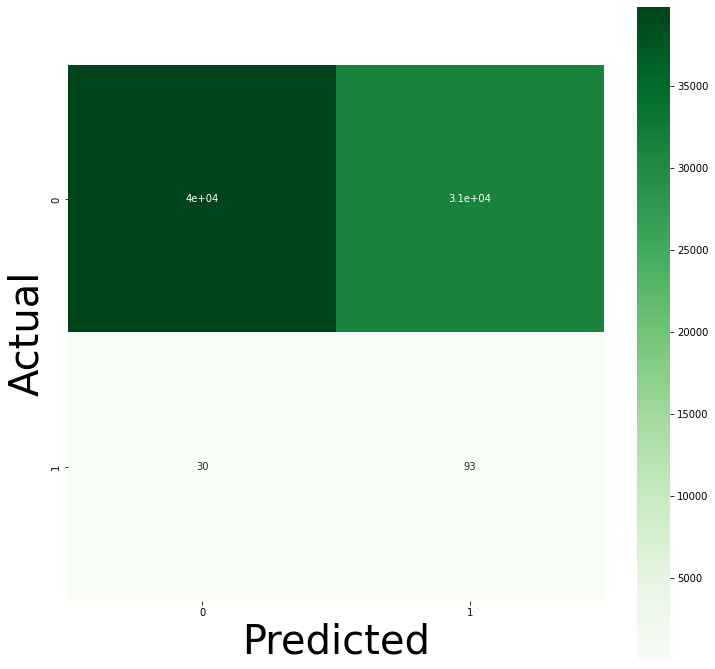

In [ ]:
classifier_2 = tf.keras.models.Sequential([   
    # deconstruct / encode
    tf.keras.layers.Dense(input_dim, activation='relu', input_shape=(input_dim, )), 
    tf.keras.layers.Dense(22, activation='relu'),
    tf.keras.layers.Dense(15, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax'),    
])

classifier_2.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=METRICS)

y_train_cat = tf.keras.utils.to_categorical(y_train)

classification_history2 = classifier.fit(
    X_train, y_train_cat,
    shuffle=True,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    callbacks=cb,
);

predictions2 = classifier.predict(X_test)
predictions2 = tf.nn.softmax(predictions)

Y_pred2 = np.argmax(predictions2, axis=1)
Y_true2 = np.argmax(y_test_cat, axis=1)

cm = confusion_matrix(Y_true2, Y_pred2)
plt.figure(figsize=(12, 12))
ax = sns.heatmap(cm, cmap=plt.cm.Greens, annot=True, square=True, xticklabels=[0, 1], yticklabels=[0, 1])
ax.set_ylabel('Actual', fontsize=40)
ax.set_xlabel('Predicted', fontsize=40)

report = classification_report(Y_true, Y_pred)
print(report)

In [ ]:
from tqdm import tqdm

evaluate_results = []
for threshold in np.arange(0, 1.01, 0.1):
    TP, FN, FP, TN = 0, 0, 0, 0
    for i in tqdm(range(len(y_test))):
        prediction = predictions[i]
        actual = y_test_cat[i]
        if prediction[1] >= threshold and actual[1] == 1:
            TP += 1
        elif prediction[1] >= threshold and actual[1] == 0:
            FP += 1
        elif prediction[1] < threshold and actual[1] == 1:
            FN += 1
        elif prediction[1] < threshold and actual[1] == 0:
            TN += 1
    result = dict()
    result['threshold'] = threshold
    result['TP'] = TP
    result['FP'] = FP
    result['FN'] = FN
    result['TN'] = TN
    result['recall'] = 0 if TP + FN == 0  else TP / (TP + FN)
    result['precision'] = 0 if TP + FP == 0 else TP / (TP + FP)
    result['accuracy'] = (TP + TN) / (TP + FN + FP + TN)
    evaluate_results.append(result)
    print(result)

100%|██████████| 71202/71202 [01:09<00:00, 1017.41it/s]


{'threshold': 0.0, 'TP': 123, 'FP': 71079, 'FN': 0, 'TN': 0, 'recall': 1.0, 'precision': 0.0017274795651807534, 'accuracy': 0.0017274795651807534}


100%|██████████| 71202/71202 [01:09<00:00, 1021.83it/s]


{'threshold': 0.1, 'TP': 123, 'FP': 71079, 'FN': 0, 'TN': 0, 'recall': 1.0, 'precision': 0.0017274795651807534, 'accuracy': 0.0017274795651807534}


100%|██████████| 71202/71202 [01:08<00:00, 1033.04it/s]


{'threshold': 0.2, 'TP': 123, 'FP': 71079, 'FN': 0, 'TN': 0, 'recall': 1.0, 'precision': 0.0017274795651807534, 'accuracy': 0.0017274795651807534}


100%|██████████| 71202/71202 [01:38<00:00, 720.62it/s]


{'threshold': 0.30000000000000004, 'TP': 93, 'FP': 31702, 'FN': 30, 'TN': 39377, 'recall': 0.7560975609756098, 'precision': 0.002924988205692719, 'accuracy': 0.5543383612819864}


100%|██████████| 71202/71202 [01:38<00:00, 720.13it/s]


{'threshold': 0.4, 'TP': 93, 'FP': 31402, 'FN': 30, 'TN': 39677, 'recall': 0.7560975609756098, 'precision': 0.0029528496586759805, 'accuracy': 0.5585517260751103}


100%|██████████| 71202/71202 [01:39<00:00, 712.10it/s]


{'threshold': 0.5, 'TP': 93, 'FP': 31258, 'FN': 30, 'TN': 39821, 'recall': 0.7560975609756098, 'precision': 0.002966412554623457, 'accuracy': 0.5605741411758096}


100%|██████████| 71202/71202 [01:39<00:00, 717.01it/s]


{'threshold': 0.6000000000000001, 'TP': 93, 'FP': 31120, 'FN': 30, 'TN': 39959, 'recall': 0.7560975609756098, 'precision': 0.002979527760868869, 'accuracy': 0.5625122889806466}


100%|██████████| 71202/71202 [01:39<00:00, 715.91it/s]


{'threshold': 0.7000000000000001, 'TP': 93, 'FP': 30692, 'FN': 30, 'TN': 40387, 'recall': 0.7560975609756098, 'precision': 0.003020951762221861, 'accuracy': 0.5685233560855032}


100%|██████████| 71202/71202 [02:04<00:00, 572.89it/s]


{'threshold': 0.8, 'TP': 0, 'FP': 0, 'FN': 123, 'TN': 71079, 'recall': 0.0, 'precision': 0, 'accuracy': 0.9982725204348193}


100%|██████████| 71202/71202 [02:02<00:00, 581.07it/s]


{'threshold': 0.9, 'TP': 0, 'FP': 0, 'FN': 123, 'TN': 71079, 'recall': 0.0, 'precision': 0, 'accuracy': 0.9982725204348193}


100%|██████████| 71202/71202 [02:02<00:00, 582.03it/s]

{'threshold': 1.0, 'TP': 0, 'FP': 0, 'FN': 123, 'TN': 71079, 'recall': 0.0, 'precision': 0, 'accuracy': 0.9982725204348193}


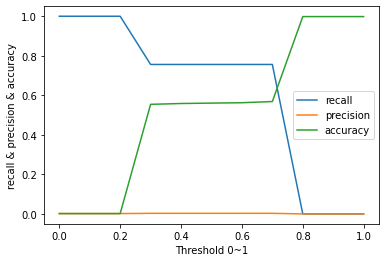

In [ ]:
threshold_array = [result['threshold'] for result in evaluate_results]
recall_array = [result['recall'] for result in evaluate_results]
precision_array = [result['precision'] for result in evaluate_results]
accuracy_array = [result['accuracy'] for result in evaluate_results]
plt.plot(threshold_array, recall_array, label='recall')
plt.plot(threshold_array, precision_array, label='precision')
plt.plot(threshold_array, accuracy_array, label='accuracy')
plt.xlabel('Threshold 0~1')
plt.ylabel('recall & precision & accuracy')
plt.legend()
plt.show()